In [15]:
import cv2
import matplotlib.pyplot as plt
import imutils
import easyocr

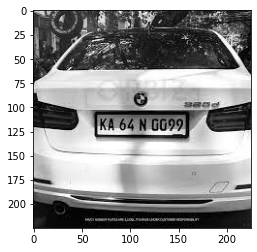

In [8]:
#path=input("Enter image path:")
path="images/ex1.jpg"
img=cv2.imread(path)
gray_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB))

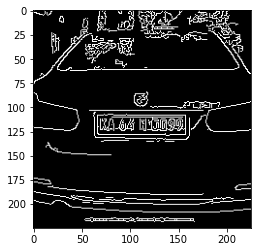

In [9]:
red_noise_img=cv2.bilateralFilter(gray_img, 11, 90, 90)
canny=cv2.Canny(red_noise_img, 0, 200)
plt.imshow(canny, cmap='gray')

In [10]:
keypoints=cv2.findContours(canny.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours, key=cv2.contourArea, reverse=True)[:5]
image_copy=img.copy()

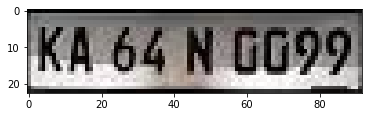

In [11]:
plate=None
for contour in contours:
    perimeter=cv2.arcLength(contour, True)
    edges_count=cv2.approxPolyDP(contour, 0.02 * perimeter, True)
    if len(edges_count)==4:
        x,y,w,h=cv2.boundingRect(contour)
        plate=img[y:y+h, x:x+w]
        break
plt.imshow(plate)               

In [18]:
#Using tesseract for detecting characters
reader=easyocr.Reader(['en'])
text=reader.readtext(plate)
plate_text=text[0][-2]

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [19]:
#Printing the number plate text
print(plate_text)

Ka 64 N 0099
